Player
A Lord              1
GLANSDALE           1
JOHN MORTIMER       1
ATTENDANT           1
All The Lords       1
                 ... 
MARK ANTONY       917
BRUTUS           1029
KING HENRY V     1073
GLOUCESTER       1150
HAMLET           1566
Name: PlayerLine, Length: 607, dtype: int64


AttributeError: 'Series' object has no attribute 'show'

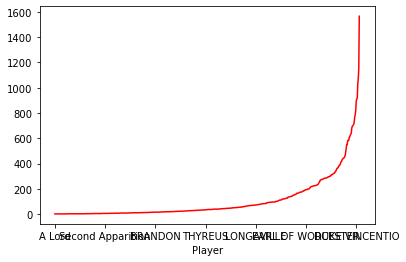

In [50]:
import numpy as np
import pandas as pd


data = pd.read_excel('Desktop/Shakespeare_data.xlsx')

numLines = data.groupby(['Player'])['PlayerLine'].nunique()
numLines = numLines.sort_values()
print(numLines)

numLines.plot( y='Player',x='Playerlines',color = 'Red',label ='Lines said per player')
numLines.show()

#new = new.to_excel('Desktop/output.xlsx') 
numLines = data.drop(columns=['Dataline','PlayerLinenumber', 'ActSceneLine'])
numLines = numLines.to_excel('Desktop/out2.xlsx') 



#Documentation:

#Ideas for feature engineering:
#1. Observing the language used in Shakespeare would be helpful -- finding the number of occurences in certain words
#2. It would be helpful for a graph that takes the character name on the x-axis and plots each important detail on the 
#y-axis, meaning above Hamlet would have the scenes he appears in, the lines, the number of lines said
#3. ---- the one I wish to implement ----- having the x-axis consist of each character, the y-axis is responsible
# for keeping track of the number of lines said by the character -> Hamlet has 300 total lines in his story, King Henry 
# said 50, etc. this is helpful for knowling the most relevant character in the story 

#Process:
#In order to see how many lines each player had, first I had to condense the Player list, so that each player was 
#only listed once, then I used the sum() to add up the playerlines for each player. Interestingly enough, this created
#a new column, called dataline which was perhaps the summed value of the original Playerlinenumber? Since this was
#interfering with the plot() I decided to drop this. Lastly, I sorted the values from lowest to highest to make the 
#graph more readable. 

#Results:
#As one could guess, Hamlet has the most lines said, at 90k lines!! No wonder he is arguably the most memorable 
#character by Shakespeare 

#Results (FAIL):
#with only 100k lines in the whole entire data set, there is NO WAY Hamlet said 90k of these. 
#Revision needed -- it turns out that the .sum() was adding up the PlayerlineNumber column and Dataline column only :(
#why would it not sum up the PlayerLine in a 3rd column???
#I believe it is because the PlayerLine is a string and therefore not able to be added like a number. If I were more 
#capable, I would make it so that each PlayerLine is assigned to a value of 1, so it would add up the actual
#number of PlayerLines and give helpful data

#Results (FIXED):
#At first I attepted to rename the lines (1-however many said per character), but it just listed it from 1-63,000,
#instead, I usedGroupBy Players and non unique playerlines. this did the trick!!!
#Hamlet is still #1, saying 1566 lines, which is much more believeable! The results determined that a good amount
#of players said little to no lines. To further the usefullness of this data, seeing the percentage of characters
# who said less then a specified number of lines would be meaningful